### Importing necessary libraries

In [182]:
# handling data
import random
import numpy as np
import pandas as pd

# Data Visualization
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

# Datasetsplit
from sklearn.model_selection import train_test_split

# ML algorithms
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Neural Network
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import Input,  Dense, Dropout, Flatten

# metrics for evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Loading the data

In [183]:
data = pd.read_csv('data.csv')
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,False
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1,1,1,1,1,True
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17,36,112,86,13,True
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17,135,329,271,5,True
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11,16,76,50,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10880,18.0,4.0,1.0,4.0,52.0,241.48,0.14,7.33,32.93,1770.86,...,13,0,2,0,10,15,30,22,7,False
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12,8,19,11,3,False
10882,42.0,4.0,1.0,2.0,103.0,519.57,0.04,26.40,19.68,13716.72,...,29,1,10,0,18,15,59,44,7,False
10883,10.0,1.0,1.0,1.0,36.0,147.15,0.12,8.44,17.44,1241.57,...,6,0,2,0,9,8,21,15,1,False


## Data Analysis

In [184]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10885 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10885 non-null  float64
 1   v(g)               10885 non-null  float64
 2   ev(g)              10885 non-null  float64
 3   iv(g)              10885 non-null  float64
 4   n                  10885 non-null  float64
 5   v                  10885 non-null  float64
 6   l                  10885 non-null  float64
 7   d                  10885 non-null  float64
 8   i                  10885 non-null  float64
 9   e                  10885 non-null  float64
 10  b                  10885 non-null  float64
 11  t                  10885 non-null  float64
 12  lOCode             10885 non-null  int64  
 13  lOComment          10885 non-null  int64  
 14  lOBlank            10885 non-null  int64  
 15  locCodeAndComment  10885 non-null  int64  
 16  uniq_Op            108

### Data Cleaning

In [185]:
data['uniq_Op'].replace({"?":np.nan},inplace=True)
data['uniq_Opnd'].replace({"?":np.nan},inplace=True)
data['total_Op'].replace({"?":np.nan},inplace=True)
data['total_Opnd'].replace({"?":np.nan},inplace=True)
data['branchCount'].replace({"?":np.nan},inplace=True)
data.isna().sum()

loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              5
uniq_Opnd            5
total_Op             5
total_Opnd           5
branchCount          5
defects              0
dtype: int64

In [186]:
data.dropna(inplace=True)

In [187]:
data[['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']] = data[['uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount']].astype("float32")
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10880 entries, 0 to 10884
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loc                10880 non-null  float64
 1   v(g)               10880 non-null  float64
 2   ev(g)              10880 non-null  float64
 3   iv(g)              10880 non-null  float64
 4   n                  10880 non-null  float64
 5   v                  10880 non-null  float64
 6   l                  10880 non-null  float64
 7   d                  10880 non-null  float64
 8   i                  10880 non-null  float64
 9   e                  10880 non-null  float64
 10  b                  10880 non-null  float64
 11  t                  10880 non-null  float64
 12  lOCode             10880 non-null  int64  
 13  lOComment          10880 non-null  int64  
 14  lOBlank            10880 non-null  int64  
 15  locCodeAndComment  10880 non-null  int64  
 16  uniq_Op            108

In [188]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
count,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.00000,1.088000e+04,...,1.088000e+04,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000,10880.000000
mean,42.020138,6.347739,3.400037,4.001415,114.391388,673.772003,0.135352,14.177339,29.43885,3.684563e+04,...,2.046980e+03,26.253125,2.738787,4.625092,0.370956,11.177592,16.751858,68.110588,46.388988,11.292316
std,76.608641,13.021924,6.772697,9.118682,249.549291,1939.253379,0.160552,18.712325,34.42332,4.344671e+05,...,2.413706e+04,59.622819,9.010486,9.969914,1.908391,10.045255,26.667883,151.513840,100.351845,22.597618
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000e+00,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,11.000000,2.000000,1.000000,1.000000,14.000000,48.430000,0.030000,3.000000,11.86000,1.619400e+02,...,9.000000e+00,4.000000,0.000000,0.000000,0.000000,5.000000,4.000000,8.000000,6.000000,3.000000
50%,23.000000,3.000000,1.000000,2.000000,49.000000,217.130000,0.080000,9.090000,21.92500,2.031020e+03,...,1.128300e+02,13.000000,0.000000,2.000000,0.000000,11.000000,11.000000,29.000000,19.000000,5.000000
75%,46.000000,7.000000,3.000000,4.000000,119.000000,620.850000,0.160000,18.902500,36.78000,1.141614e+04,...,6.342350e+02,28.000000,2.000000,5.000000,0.000000,16.000000,21.000000,71.000000,48.000000,13.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,418.200000,569.78000,3.107978e+07,...,1.726655e+06,2824.000000,344.000000,447.000000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000


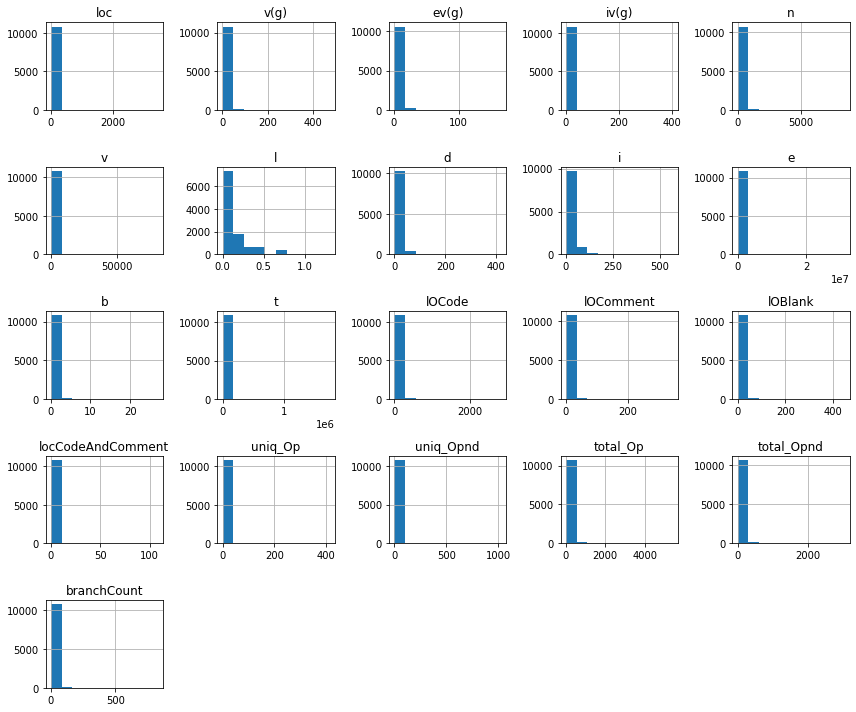

In [189]:
data.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

### Checking correlation between the features

<AxesSubplot:>

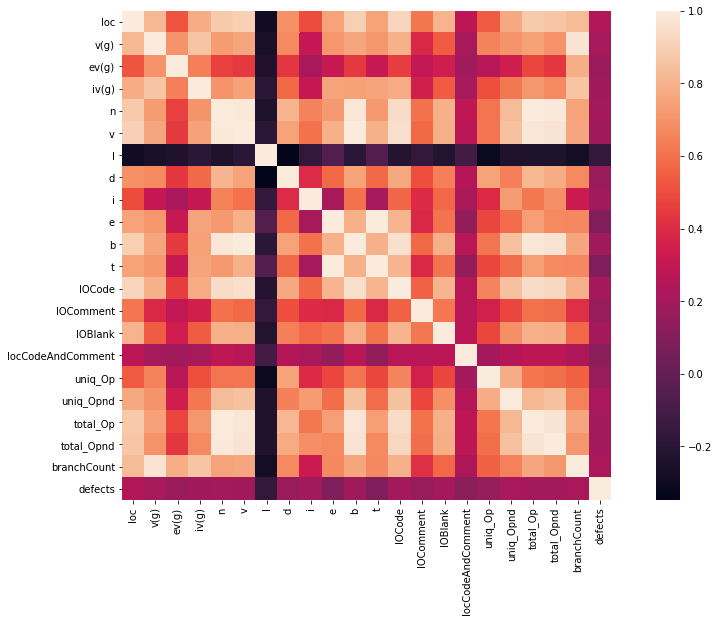

In [190]:
correlation = data.corr()
plt.figure(figsize = (16,9))
sns.heatmap(correlation, square = True)

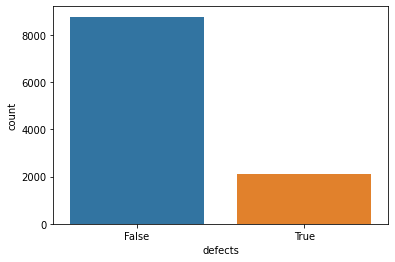

In [191]:
sns.countplot(x=data["defects"])
plt.show()

In [192]:
random.seed(1)
for i in range(4000):
    bal = data[data["defects"]==0]
    bal_r = random.choice(bal.index)
    data.drop(index=bal_r,inplace=True)

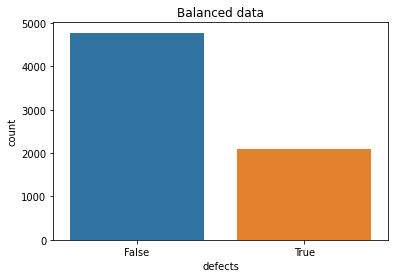

In [193]:
sns.countplot(x=data["defects"])
plt.title("Balanced data")
plt.show()

In [194]:
data['defects'].replace({False:0,True:1},inplace=True)
data

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,1.1,1.4,1.4,1.4,1.3,1.30,1.30,1.30,1.30,1.30,...,2,2,2,2,1.2,1.2,1.2,1.2,1.4,0
1,1.0,1.0,1.0,1.0,1.0,1.00,1.00,1.00,1.00,1.00,...,1,1,1,1,1.0,1.0,1.0,1.0,1.0,1
2,72.0,7.0,1.0,6.0,198.0,1134.13,0.05,20.31,55.85,23029.10,...,51,10,8,1,17.0,36.0,112.0,86.0,13.0,1
3,190.0,3.0,1.0,3.0,600.0,4348.76,0.06,17.06,254.87,74202.67,...,129,29,28,2,17.0,135.0,329.0,271.0,5.0,1
4,37.0,4.0,1.0,4.0,126.0,599.12,0.06,17.19,34.86,10297.30,...,28,1,6,0,11.0,16.0,76.0,50.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10875,37.0,6.0,1.0,4.0,104.0,524.62,0.04,23.75,22.09,12459.65,...,29,0,4,2,19.0,14.0,69.0,35.0,11.0,0
10876,10.0,2.0,1.0,1.0,21.0,82.04,0.27,3.67,22.38,300.83,...,5,0,3,0,6.0,9.0,10.0,11.0,3.0,0
10877,5.0,1.0,1.0,1.0,4.0,8.00,0.67,1.50,5.33,12.00,...,2,0,1,0,3.0,1.0,3.0,1.0,1.0,0
10881,9.0,2.0,1.0,2.0,30.0,129.66,0.12,8.25,15.72,1069.68,...,5,0,2,0,12.0,8.0,19.0,11.0,3.0,0


In [195]:
data.describe()

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
count,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6.880000e+03,...,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000,6880.000000
mean,47.305102,7.117209,3.728692,4.463576,127.728677,770.491610,0.129012,15.034942,31.058016,4.668496e+04,...,29.391715,3.213953,5.143023,0.444186,11.577355,18.192907,76.100029,51.753952,12.720116,0.305669
std,89.741872,15.437577,7.612053,10.917192,285.806370,2280.390575,0.157600,20.063476,37.081394,5.335592e+05,...,70.164110,10.378539,11.143758,2.245267,11.428298,31.028852,173.893051,114.518753,26.383183,0.460724
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,12.000000,2.000000,1.000000,1.000000,15.000000,51.890000,0.030000,3.300000,11.997500,1.743600e+02,...,4.000000,0.000000,0.000000,0.000000,5.000000,5.000000,9.000000,6.000000,3.000000,0.000000
50%,24.000000,3.000000,1.000000,2.000000,52.000000,235.230000,0.070000,9.500000,22.735000,2.309160e+03,...,13.000000,0.000000,2.000000,0.000000,11.000000,11.000000,31.000000,20.000000,5.000000,0.000000
75%,52.000000,7.250000,4.000000,4.000000,131.000000,697.745000,0.150000,20.142500,39.000000,1.346827e+04,...,31.000000,2.000000,6.000000,0.000000,16.000000,22.000000,78.000000,53.000000,13.000000,1.000000
max,3442.000000,470.000000,165.000000,402.000000,8441.000000,80843.080000,1.300000,408.730000,569.780000,3.107978e+07,...,2824.000000,344.000000,447.000000,108.000000,411.000000,1026.000000,5420.000000,3021.000000,826.000000,1.000000


# Spliting Data into training and testing sets

In [196]:
x_train,x_test,y_train,y_test = train_test_split(data.drop(columns=["defects"]), data["defects"], test_size=0.2,random_state=0)

In [197]:
print("x_train: ",x_train.shape,"\n"+"x_test: ",x_test.shape,"\n"+"y_train: ",y_train.shape,"\n"+"y_test: ",y_test.shape)

x_train:  (5504, 21) 
x_test:  (1376, 21) 
y_train:  (5504,) 
y_test:  (1376,)


## Training Random Forest Classifier model

In [198]:
rfr = RandomForestClassifier()
rfr.fit(x_train,y_train)

RandomForestClassifier()

### Evaluating Random Forest Classifier model

In [199]:
rfr_pred = rfr.predict(x_test)
print("accuracy score: ",accuracy_score(y_test, rfr_pred))

accuracy score:  0.7376453488372093


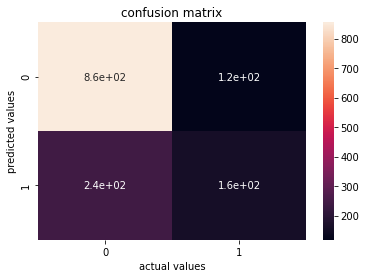

In [215]:
sns.heatmap(confusion_matrix(y_test, rfr_pred),annot=True)
plt.ylabel("predicted values")
plt.xlabel("actual values")
plt.title("confusion matrix")
plt.show()

In [208]:
print(classification_report(y_test, rfr_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       973
           1       0.58      0.40      0.47       403

    accuracy                           0.74      1376
   macro avg       0.68      0.64      0.65      1376
weighted avg       0.72      0.74      0.72      1376



### Training SVM model

In [210]:
svm = SVC()
svm.fit(x_train,y_train)

SVC()

### Evaluating SVM model

In [211]:
svm_pred = svm.predict(x_test)
print("accuracy score: ",accuracy_score(y_test, svm_pred)*100,"%")

accuracy score:  71.2936046511628 %


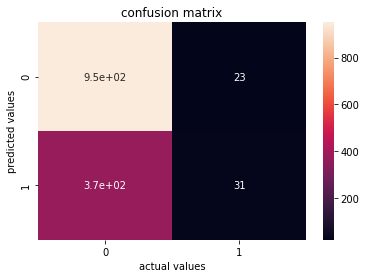

In [216]:
sns.heatmap(confusion_matrix(y_test, svm_pred),annot=True)
plt.ylabel("predicted values")
plt.xlabel("actual values")
plt.title("confusion matrix")
plt.show()

In [214]:
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       973
           1       0.57      0.08      0.14       403

    accuracy                           0.71      1376
   macro avg       0.65      0.53      0.48      1376
weighted avg       0.68      0.71      0.63      1376



## Artificial Neural Network creation

In [219]:
seed = 1
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(64, input_dim=21, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))
# Compile model
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="adam",
    metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 64)                1408      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_9 (Dense)              (None, 2)                 66        
Total params: 11,874
Trainable params: 11,874
Non-trainable params: 0
_________________________________________________________________


## Training the ANN

In [220]:
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    "save_model.h5", monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='auto', save_freq='epoch',
    options=None,)

# TRAINING THE MODEL
model.fit(x_train,y_train, epochs=50, batch_size=64,callbacks=checkpoint,validation_split=0.1)

Epoch 1/50
78/78 [==============================] - 1s 8ms/step - loss: 314.1238 - accuracy: 0.4948 - val_loss: 539.6785 - val_accuracy: 0.4102

Epoch 00001: val_loss improved from inf to 539.67847, saving model to save_model.h5
Epoch 2/50
78/78 [==============================] - 0s 6ms/step - loss: 322.4603 - accuracy: 0.6001 - val_loss: 52.9388 - val_accuracy: 0.5281

Epoch 00002: val_loss improved from 539.67847 to 52.93878, saving model to save_model.h5
Epoch 3/50
78/78 [==============================] - 0s 6ms/step - loss: 124.7329 - accuracy: 0.6368 - val_loss: 18.3055 - val_accuracy: 0.7260

Epoch 00003: val_loss improved from 52.93878 to 18.30547, saving model to save_model.h5
Epoch 4/50
78/78 [==============================] - 0s 6ms/step - loss: 59.2793 - accuracy: 0.6666 - val_loss: 375.6681 - val_accuracy: 0.7151

Epoch 00004: val_loss did not improve from 18.30547
Epoch 5/50
78/78 [==============================] - 0s 6ms/step - loss: 385.6714 - accuracy: 0.5937 - val_loss

In [222]:
from tensorflow.keras.models import load_model
# LOADING THE BEST SAVED MODEL
model = load_model("save_model.h5")

In [225]:
ANN_pred = []
for i in model.predict(x_test):
    ANN_pred.append(i.argmax())
print("accuracy score: ",accuracy_score(y_test, ANN_pred)*100,"%")

accuracy score:  73.47383720930233 %


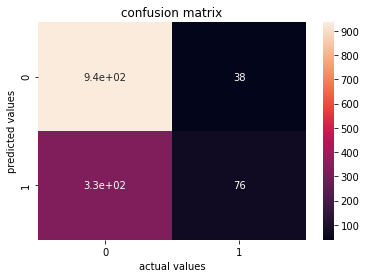

In [227]:
sns.heatmap(confusion_matrix(y_test, ANN_pred),annot=True)
plt.ylabel("predicted values")
plt.xlabel("actual values")
plt.title("confusion matrix")
plt.show()

In [226]:
print(classification_report(y_test, ANN_pred))

              precision    recall  f1-score   support

           0       0.74      0.96      0.84       973
           1       0.67      0.19      0.29       403

    accuracy                           0.73      1376
   macro avg       0.70      0.57      0.57      1376
weighted avg       0.72      0.73      0.68      1376

